In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from code.preprocessing import get_dataset
from code.pca import customPCA
from code.optics import apply_optics
from code.kmeans import run_kmeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [38]:
def process_and_cluster(data, pca_threshold=0.90, n_components=3, n_clusters=3, kmeans_distance='euclidean', optics_metric='euclidean', optics_algorithm='auto'):

    # Apply PCA
    pca = customPCA()
    reduced_data = pca.reduce_dim(data, threshold=pca_threshold, n_components=n_components)


    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data [:,0], reduced_data [:,1], c=reduced_data[:,2], cmap='viridis', alpha=0.7)

    # Add a color bar to show the gradient
    plt.colorbar(scatter, label='Third Dimension (Color Gradient)')

    plt.xlabel('First Component (X)')
    plt.ylabel('Second Component (Y)')
    plt.title(f'Dataset {dataset} after applying PCA and leaving 3 principal components')
    plt.show()

    # Clustering with K-Means
    kmeans_clusters, kmeans_labels = run_kmeans(reduced_data, n_clusters=n_clusters, distance=kmeans_distance)
    kmeans_silhouette = silhouette_score(reduced_data, kmeans_labels)

    print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

    # Clustering with OPTICS
    optics_labels = apply_optics(reduced_data, metric=optics_metric, algorithm=optics_algorithm)
    optics_silhouette = silhouette_score(reduced_data, optics_labels)

    print(f"OPTICS Silhouette Score: {optics_silhouette:.4f}")

    # Compare results
    results = pd.DataFrame({
        'Data Point': range(len(data)),
        'K-Means Cluster': kmeans_labels,
        'OPTICS Cluster': optics_labels
    })
    print(results)

In [39]:
dataset = "vowel"
x, y = get_dataset(dataset)
ds = x.copy()
ds["target"] = y

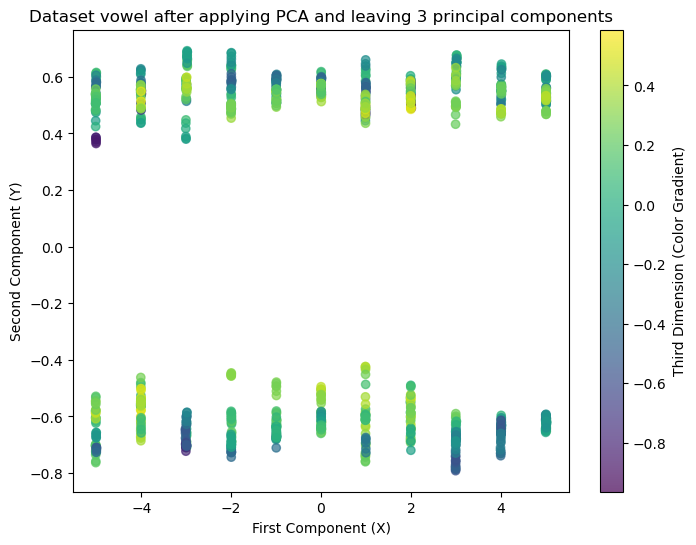

K-Means Silhouette Score: 0.3900
OPTICS Silhouette Score: 0.4916
     Data Point  K-Means Cluster  OPTICS Cluster
0             0                4              -1
1             1                1              -1
2             2                1              16
3             3                1              17
4             4                8              11
..          ...              ...             ...
985         985                2              14
986         986               10              24
987         987                2               8
988         988               10              26
989         989               11               3

[990 rows x 3 columns]


In [40]:
process_and_cluster(ds, pca_threshold=0.95, n_components=3, n_clusters=12, kmeans_distance='cosine', optics_metric='minkowski', optics_algorithm='ball_tree')

In [41]:
dataset = "sick"
x, y = get_dataset(dataset)
ds = x.copy()
ds["target"] = y

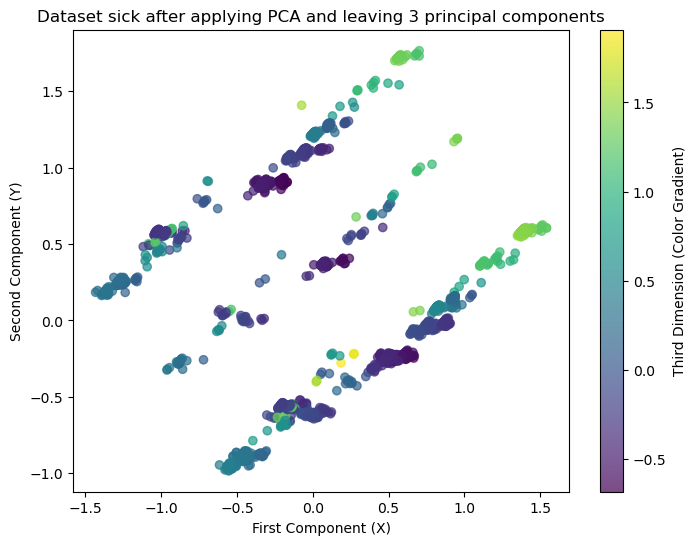

K-Means Silhouette Score: 0.5964
OPTICS Silhouette Score: -0.2292
      Data Point  K-Means Cluster  OPTICS Cluster
0              0                3              -1
1              1                2              -1
2              2                6              33
3              3                2              15
4              4                3              -1
...          ...              ...             ...
3765        3765                5              -1
3766        3766                3              -1
3767        3767                4               6
3768        3768                0              28
3769        3769                4              -1

[3770 rows x 3 columns]


In [44]:
process_and_cluster(ds, pca_threshold=0.95, n_components=3, n_clusters=7, kmeans_distance='manhattan', optics_metric='manhattan', optics_algorithm='kd_tree')